### **Code for determining the number of EV charging stations per town in MA and creating web map of results**
Caylee Chan

Created: 1 Feb 2026

Updated: 1 Feb 2026

In [1]:
# Modules
import pandas as pd
import geopandas as gpd

### **EV Charging Station Data**

CRS: EPSG:26986, NAD83 / Massachusetts Mainland
Shape: (3372, 5)


<Axes: >

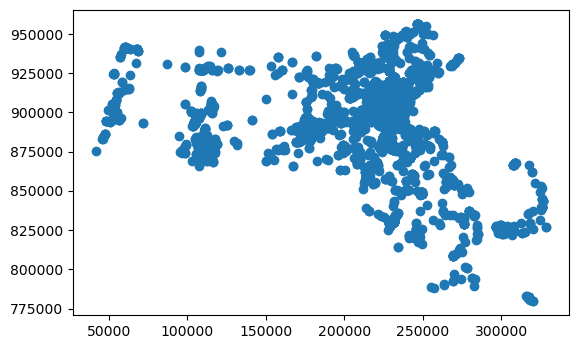

In [33]:
# EV charging stations data
ev_charging_stations = gpd.read_file(r'..\data\charging_stations\Electric_Vehicle_Charging_Stations.shp')[['station_na', 'station_ph', 'street_add', 'zip', 'geometry']]

# Print metadata
print(f'CRS: {ev_charging_stations.crs}, {ev_charging_stations.crs.name}')
print(f'Shape: {ev_charging_stations.shape}')

# Plot - no misc points falling outside Mass boundaries 
ev_charging_stations.plot()

There are 38 duplicate EV charging stations
Shape: (3334, 5)


<Axes: >

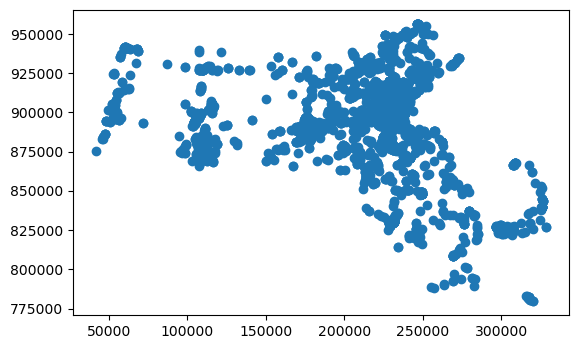

In [43]:
# Data cleaning

# Identify duplicate charging station coordinates
ev_charging_stations_dups = ev_charging_stations.duplicated(subset = 'geometry')
print(f'There are {ev_charging_stations[ev_charging_stations_dups].shape[0]} duplicate EV charging stations')

# Remove duplicates
ev_charging_stations_clean = ev_charging_stations.drop_duplicates(subset = 'geometry')

# Cleaned data
print(f'Shape: {ev_charging_stations_clean.shape}')
ev_charging_stations_clean.plot()

CRS: EPSG:26986, NAD83 / Massachusetts Mainland
Shape: (351, 2)


<Axes: >

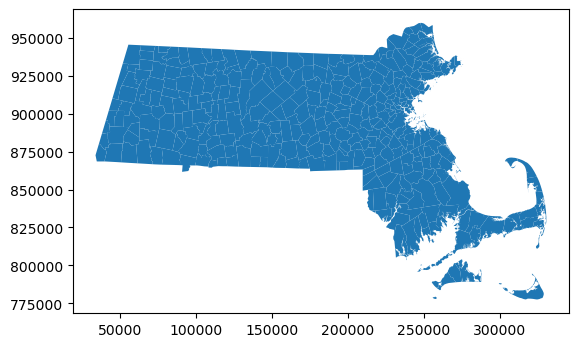

In [34]:
# Municipal boundaries data
boundaries = gpd.read_file(r'..\data\municipal_boundaries\Massachusetts_Municipalities_(Feature_Layer).shp')[['TOWN', 'geometry']]

# Print metadata
print(f'CRS: {boundaries.crs}, {boundaries.crs.name}')
print(f'Shape: {boundaries.shape}')

# Plot - no misc points falling outside Mass boundaries 
boundaries.plot()

In [48]:
# Obtain number of charging stations per municipality

# Spatial join to get the municipality for each charging station
stations_in_municipalities = boundaries.sjoin(ev_charging_stations_clean, how = 'inner')

# Count number of charging stations per municipality
stations_in_municipalities['counter'] = 1
stations_per_municipality = stations_in_municipalities.groupby('TOWN')['counter'].sum()
stations_per_municipality


TOWN
ABINGTON       2
ACTON         11
ACUSHNET       1
ADAMS          1
AGAWAM         9
            ... 
WINTHROP       1
WOBURN        17
WORCESTER    121
WRENTHAM       5
YARMOUTH      19
Name: counter, Length: 253, dtype: int64